## Kaggle Titanic Prediction with Logistic Regression (Version 1)

by [Johnny Chan](https://github.com/Atlas7) | [GitHub Repo](https://github.com/Atlas7/visualize-traffic-accidents-in-uk) | [MIT Licence](https://github.com/Atlas7/visualize-traffic-accidents-in-uk/blob/master/LICENSE)

![titanic-logistic-regression-4.jpg](../assets/images/titanic-logistic-regression-4.jpg)

Note: this notebook is very draft. It is a result of a 24 hour personal "hackathon" to go from reading the [Kaggle Titanic](https://www.kaggle.com/c/titanic) CSV training and test dataset, to performing prediction passenger survival from input features. Lots of google-searches, stackoverflow troubleshoots, Kaggle Kernal studies, and trail-and-errors were involved in the making of this notebook. It's not my most elegant notebook though it has helped me learn.

Why this notebook?

- to use as a starting point of applying machine learning techniques in conjunction with lots of data cleaning and transformation exercises.
- potentially refactor into reusable functions that may be use to perform model training / inferences against the UK traffic accident / traffic flow datasets.

Use this notebook to learn about:

- Pandas, Numpy, Matplotlib, Tensorflow, Scikit-learn
- CSV Data Import
- Data Cleaning, Transformation, Aggregation, and Analysis
- Simple Logistic Regression Neural Network (with no hidden layer)
- Train / Validation / Test dataset split
- Feature Scaling with Standardization
- Kaggle Submission

Q: Where to store input CSVs downloaded from Kaggle? A: store under the folder `/input/titanic`.

Q: Where does the outputs (e.g. Tensorflow files, final prediction CSV, etc) go? A: under the folder `/input/notebooks/titanic`.

Q: how to setup conda environment? A: See repository README.

**Note to self**: at some point I should really create a standalone GitHub repository to exclusively store Kaggle Titanic related exercises.

Inspirations Kaggle Kernal: https://www.kaggle.com/kbc8894/tutorial-titanic-with-tensorflow

## Notes

- the goal is to get from start to finish as quickly as possible!
- note to self: I have cloned lots of Tensorflow codes from [this Kaggle Kernal](https://www.kaggle.com/kbc8894/tutorial-titanic-with-tensorflow). It seems to work - though I really should come back to it and try to understand it more thoroughly. That said, in this version 1 I have successfully delivered respectable accuracies (lots to improve on indeed!):
    - Train Accuracy: 0.830424
    - Valid Accuracy: 0.741573
    - Test Accuracy: 0.73684 (on Kaggle Public Leaderboard that shows 50% of test data)
    
I have however developed most of the Data Cleaning and Transformation steps myself (following tons of internet searches and trial and error experiments). So this notebook at a minimum should come in handy for refernce guide / memory refresh purposes.

**Important note: I have a feeling I might not have setup our controlled random seed properly. (It appears repeated runs don't produce same result. Need fixing).**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input/titanic"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

gender_submission.csv
test.csv
train.csv



In [2]:
%matplotlib inline

In [3]:
# use this to control random state when we do things like shuffling
SEED = 0
np.random.seed(SEED)

In [4]:
%pwd

'/Users/johnny/repos/visualize-traffic-accidents-in-uk/notebooks'

In [5]:
# make sure output directory exists (where we store tensorflow files, output CSV etc), if not, create it.
# (This folder will not be tracked by git.)
import os
os.makedirs("./titanic",exist_ok=True)

## Import Training Data

Please first get familiar with the [Kaggle Titanic Data Definition](https://www.kaggle.com/c/titanic/data) to understand what each column means.

In our labeled dataset `train.csv` we should have 891 rows corresponding to 891 passengers. And 12 columns: 1 column shows the Passenger ID, 1 column shows the training label (`Survived` = 1 if survived. Otherwise 0), and the remaining 10 columns are features for the passengers.

What we probably want to do:

- parse the `train.csv` into a Pandas DataFrame (call it `df`)
- clean our training dataset (call this `df2`)
- split this trainining dataset into 2 chunks: `df_train` (to train our machine learning model) and `df_val` (to validate our model). A 90% train and 10% test may be a good start.

There is also an unlabeled dataset `test.csv` which has essentially the same structure as `train.csv`, except without the `Survived` column (the training label).

We will focus on `train.csv` for now as we can already start using it to build and validate a model. When both our training and testing accuracies are reasonably good, we can run the inference (prediction) against `test.csv` later on.

In [6]:
# parse CSV into a Pandas DataFrame
df =pd.read_csv('../input/titanic/train.csv')

In [7]:
# Take a peek at first 5 rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# Take a peek at last 5 rows
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [9]:
# What columns do we have?
# What are the inferred datatypes by Pandas?
# How complete are our data?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [10]:
df.shape

(891, 12)

Observation:

- 891 rows (passengers)
- 12 columns

Columns Deep Dive:

- ID Column: `PassengerId` is the unique passenger identifier. No missing data.
- Training Label Column: `Survived` is our training labels. No missing data.
- 10 Feature columns:
    - 177 rows with missing `Age`
    - 687 rows with missing `Cabin`
    - 2 rows with missing `Embarked`
    
We may use this to form our Data Cleaning Strategy. Our goal: (1) to have a dataset as clean as possible, and (2) have as little rows dropped as possible.

## Data Cleaning Strategy

Version 1 KISS (keep it simple and stupid) strategy - use what we've got now to come up with a prediction quickly. We will come back later on to perfect model in Version 2 (in the future).

1. We ignore the column `Cabin` in the forming of our model for now (too many missing data). Though we may come back to this at a later time. It turns out we may be able to manually dig out the Cabin information from the Website [encyclopedia-titanica.org](https://www.encyclopedia-titanica.org/).
2. Regarding the 2 rows with missing `Embarked`, it turns out we can eaisly find that both passengers borded on Southampton according to [encyclopedia-titanica.org](https://www.encyclopedia-titanica.org/). We will fill these in manually.
3. We fill the missing `Age` with the median age of the training data. (This avoids us having to drop all 177 rows!). Again, at a later time we may want to manually hunt down more data from [encyclopedia-titanica.org](https://www.encyclopedia-titanica.org/) or other sources.

In [11]:
# Before: we have 891 rows and 12 columns
df.shape

(891, 12)

In [12]:
assert df.shape[0] == 891
assert df.shape[1] == 12

### Drop Cabin Column

In [13]:
# 1 - We ignore the column Cabin (too many missing data)
df2 = df.drop(['Cabin'], axis=1)

# Now we have 1 less column
df2.shape

(891, 11)

In [14]:
assert df2.shape[0] == 891
assert df2.shape[1] == 11

### Manually fill in the `Embarked` data for the 2 passengers

First of all, let's just double check that we indeed have 2 rows with missing "Embarked". We should see Passenger 61 (Icard, Miss. Amelie) and Passenger 829 (Stone, Mrs. George Nelson (Martha Evelyn) here.

In [15]:
df2.loc[pd.isnull(df["Embarked"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


- Passenger 61 - [Miss Rose Amélie Icard](https://www.encyclopedia-titanica.org/titanic-survivor/amelia-icard.html) embarked at Southampton according to [encyclopedia-titanica.org](https://www.encyclopedia-titanica.org)
- Passenger 829 - [Mrs Martha Evelyn Stone](https://www.encyclopedia-titanica.org/titanic-survivor/martha-evelyn-stone.html) embarked at Southampton according to [encyclopedia-titanica.org](https://www.encyclopedia-titanica.org)

Now manually fille in the `Embarked` data for these two passengers.

In [16]:
df3 = df2.copy()
df3.loc[df3["PassengerId"] == 62, "Embarked"] = "S"
df3.loc[df3["PassengerId"] == 830, "Embarked"] = "S"

In [17]:
df3.loc[df3["PassengerId"].isin([62, 830]), :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,S


In [18]:
# Just to double check we now have 100% non-null Embarked values
df3.loc[pd.notnull(df3["Embarked"])].shape

(891, 11)

In [19]:
assert df3.shape[0] == 891
assert df3.shape[1] == 11

### Fill the missing `Age` with the median value

We can perform a one-liner Pandas query and discover the median age is around 28 years old. (see the 50th percentile value below for the `Age` Column.

In [20]:
# describe numerical columns
df3.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
# Let's store this median value away.
median_age = df["Age"].median()
median_age

28.0

Before we do any filling let's just take a peek of some rows with missing `Age` data

In [22]:
df3.loc[pd.isnull(df3["Age"])].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q


Now let's fill all the missing `Age` with `median_age`. This is the Pandas API for it. [fillna](http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.fillna.html).

```.py
DataFrame.fillna(value=None, method=None, axis=None, inplace=False, limit=None, downcast=None, **kwargs)¶
```

In [23]:
# make a copy just in case as we are replacing values in original dataframe
df4 = df3.copy()

In [24]:
# Create a `FakeAge` flag (1=True/0=False) to indicate the Age column is fake due to NaN
df4["FakeAge"] = df4["Age"].apply(lambda x: True if np.isnan(x) else False)

In [25]:
# Do some spot check - our FakeAge flag should be correct.

# Passengers with non-null Age values should get a FakeAge of False
assert df4.loc[df4["PassengerId"] == 1]["FakeAge"].bool() is False
assert df4.loc[df4["PassengerId"] == 2]["FakeAge"].bool() is False
assert df4.loc[df4["PassengerId"] == 3]["FakeAge"].bool() is False
assert df4.loc[df4["PassengerId"] == 4]["FakeAge"].bool() is False

# Passengers with null Age values should get a FakeAge of True
assert df4.loc[df4["PassengerId"] == 6]["FakeAge"].bool() is True
assert df4.loc[df4["PassengerId"] == 18]["FakeAge"].bool() is True
assert df4.loc[df4["PassengerId"] == 20]["FakeAge"].bool() is True
assert df4.loc[df4["PassengerId"] == 27]["FakeAge"].bool() is True
assert df4.loc[df4["PassengerId"] == 29]["FakeAge"].bool() is True

In [26]:
# fill NaN age with our `median_age`
df4["Age"] = df4["Age"].fillna(median_age)

In [27]:
# we can confirm none of our rows contain missing `Age`.
df4.loc[pd.isnull(df4["Age"])].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FakeAge


Let's double check against our 5 passengers with missing `Age`. We should expect it's been filled with the median age value of `28`

In [28]:
sample_missing_age_passengers = df3.loc[pd.isnull(df3["Age"])].loc[:, "PassengerId"].head()
sample_missing_age_passengers

5      6
17    18
19    20
26    27
28    29
Name: PassengerId, dtype: int64

In [29]:
df4.loc[df4["PassengerId"].isin(sample_missing_age_passengers), :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FakeAge
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q,True
17,18,1,2,"Williams, Mr. Charles Eugene",male,28.0,0,0,244373,13.0000,S,True
19,20,1,3,"Masselmani, Mrs. Fatima",female,28.0,0,0,2649,7.2250,C,True
26,27,0,3,"Emir, Mr. Farred Chehab",male,28.0,0,0,2631,7.2250,C,True
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,28.0,0,0,330959,7.8792,Q,True


We have just filled all our missing `Age` rows with the median age `28.0`.

In [30]:
# Ensure none of our age values are missing
assert df4["Age"].isnull().values.any() == False
assert df4["Age"].notnull().values.all() == True

### No more missing values

After the 3 rounds of data cleaning we should see no missing data in our dataframe.

In [31]:
assert df4.isnull().values.any() == False
assert df4.notnull().values.all() == True

In [32]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
FakeAge        891 non-null bool
dtypes: bool(1), float64(2), int64(5), object(4)
memory usage: 77.5+ KB


In [33]:
df4.shape

(891, 12)

In [34]:
assert df4.shape[0] == 891
assert df4.shape[1] == 12

We've avoided dropping any rows by:

- manually fill in the missing age data for the two passengers.
- use the median age of the training dataset for the 177 passengers. (Note: this approach is ok for our version 1 model building and forming prediction. in our later version 2 we may try to do better on this).

## Index our DataFrame

Now that we have cleaned our Dataset, I believe it is an appropropriate time to index our DataFrame with the `PassengerId` Column. I didn't do it earlier becasue I didn't want us to get too distracted at such an early stage.

In [35]:
df5 = df4.copy()
df5 = df5.set_index("PassengerId")
df5.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FakeAge
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,False
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,False
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,False
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,False


In [36]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Embarked    891 non-null object
FakeAge     891 non-null bool
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 77.4+ KB


In [37]:
# Tidy up
del df, df2, df3, df4

## Which columns to use and ignore

Now we have 9 clean feature columns, we will decide which ones to use in our Machine Learning Model, and which ones to ignore. Let's take a quick peek at our data again.

In [38]:
df5.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FakeAge
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,False
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,False
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,False
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,False


In [39]:
# show string categorical column overview
df5.describe(include="O")

,Name,Sex,Ticket,Embarked
count,891,891,891,891
unique,891,2,681,3
top,"Rice, Master. George Hugh",male,CA. 2343,S
freq,1,577,7,646


Columns to use:

- `Survival`: this is our training label. We will use this.
- `Pclass`: categorical feature data. We will use this.
- `Sex`: categorical feature data. We will use this.
- `SibSp`: categorical feature data. We will use this.
- `Parch`: categorical feature data. We will use this.
- `Embarked`: categorical feature data. We will use this.
- `Age`: numerical feature data. We will use this.
- `Fare`: numerical feature data. We will use this.

Columns to ignore:

- `Name`: each passenger has a unique name. Not that useful for modelling (for now)
- `Ticket`: this appears to be identifier for ticket number. Not that useful for modelling (for now)

## EDA: Visualize Categorical Inputs

Let's do a quick EDA (Explorational Data Analysis) of our Categorical Inputs

### Ticket Class (Categorical)

`Pclass` values is in the set of `[1, 2, 3]` - We can pivot this column into `Is1stClass`, `Is2ndClass` and `Is3rdClass`. (1 = True, 0 = False).

This analysis shows that most passengers were in 3rd class. 1st and 2nd class passenger counts are more or less equal, with a combined size of just less then the 3rd class pool.

## Data Transformation Strategy

Now that we have our clean data, we will need to transform it a little - to enable us to "plug" into a linear regression model easily. Each feature column will become a Neural Network **node** (or so called **neuron**).

In a nutshell, we need to transform our categorical and numerical columns like this:

- Each categorical column needs to get pivoted. For example, the `Pclass` column currently may have the categorical value of 1, 2, or 3. We need to split this out into 3 columns, such as `is_1st_class`, `is_2nd_class`, `is_3rd_class` - so that each of these column may only be 1 (True) or 0 (False).
- All numerical columns needs be put through **Standardization** (Scikit-learn has a nice easy tool to help us with that) - so that all input values will have more or less similar magnitude. This has been proven to increase training effectiveness.

In [40]:
pclass_group = df5.groupby('Pclass')["Pclass"]

In [41]:
pclass_group.count()

Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64

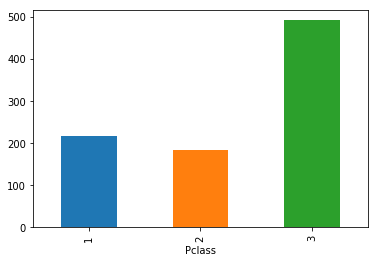

In [42]:
pclass_group.count().plot(kind="bar")

### Sex (Categorical)

`Sex` values is in the set of `["male", "female"]` - We can pivot this column into `IsMale` and `IsFemale`. (1 = True, 0 = False).

This analysis shows that number of male passengers are just under double of femal passengers.

In [43]:
sex_group = df5.groupby('Sex')['Sex']

In [44]:
sex_group.count()

Sex
female    314
male      577
Name: Sex, dtype: int64

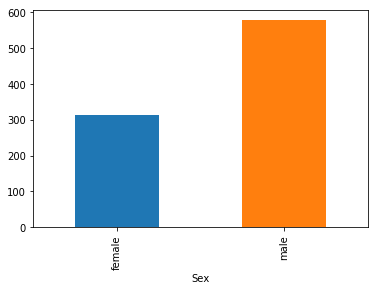

In [45]:
sex_group.count().plot(kind="bar")

### Embarked (Categorical)

`Embarked` values is in the set of `["C", "Q", "S"]`. We can pivot this column into `EmbarkedC`, `EmbarkedQ`, and `EmbarkedS`. (1 = True, 0 = False).

- S = Southampton
- C = Cherbourg, 
- Q = Queenstown, 

This analysis shows that majority of passengers embarked from Southampton (S), followed by Cherbourg (C), and then Queenstown (Q).

In [46]:
embarked_group = df5.groupby('Embarked')['Embarked']

In [47]:
embarked_group.count()

Embarked
C    168
Q     77
S    646
Name: Embarked, dtype: int64

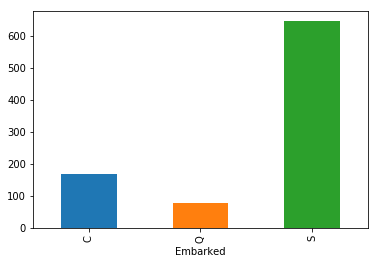

In [48]:
embarked_group.count().plot(kind='bar')
# embarked_group.count().sort_values(ascending=False).plot(kind="bar")

## EDA: Visualize Numerical Inputs

Let's do a quick EDA (Explorational Data Analysis) of our Numerical Inputs

### Age (Numerical)

`Age`: Age in year.

This analysis shows that majority of passengers are between 20 and 35 years old. Note the aartifiall high frequency of age 28 - this is very likely a result of our data cleaning step earlier (fill NaN with median of 28). At some point in time we may want to question ourselve whether this data fill technique is valid. e.g. we might want to infere age from other features instead - but that's another problem to solve for another day.

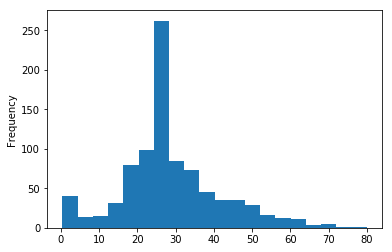

In [49]:
# Fare histogram overall - note the artifially high age of 28 is probably from our
# data cleaning step (fill NaN with missing value of 28)
df5["Age"].plot(kind="hist", bins=20)

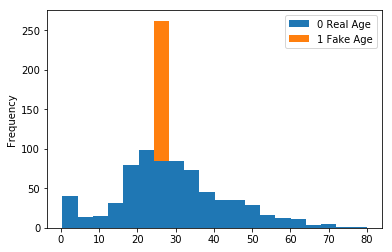

In [50]:
p = pd.DataFrame(
  {'0 Real Age': df5.groupby('FakeAge').get_group(False)["Age"],
   '1 Fake Age': df5.groupby('FakeAge').get_group(True)["Age"]})
p.plot.hist(bins=20, stacked=True)

### Number of siblings / spouses aboard the Titanic (Numerical)

`SibSp`: Number of siblings / spouses aboard the Titanic.

In [51]:
sibsp_group = df5.groupby('SibSp')['SibSp']

In [52]:
sibsp_group.count()

SibSp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: SibSp, dtype: int64

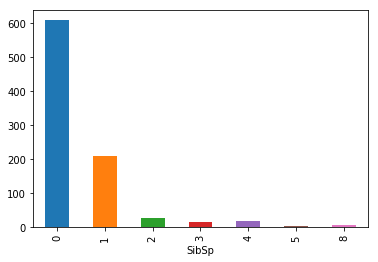

In [53]:
sibsp_group.count().plot(kind="bar")

### Number of parents / children aboard the Titanic (Numerical)

`Parch`: Number of parents / children aboard the Titanic	

In [54]:
parch_group = df5.groupby('Parch')['Parch']

In [55]:
parch_group.count()

Parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: Parch, dtype: int64

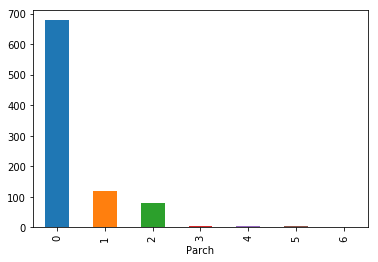

In [56]:
parch_group.count().plot(kind="bar")

### Passenger Fare (Numerical - Continuous)

`Fare`: Passenger Fare: as expected we should observe:

- most passengers were in 3rd class
- the higher the class, the higher the fare

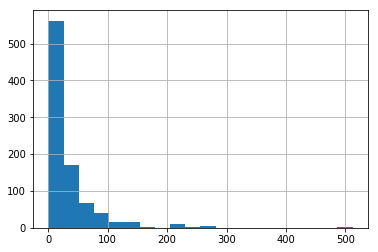

In [57]:
# Fare histogram overall
df5["Fare"].hist(bins=20)

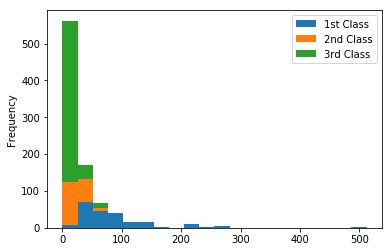

In [58]:
# Fare histogram breakdown by class
# https://stackoverflow.com/questions/41622054/stacked-histogram-of-grouped-values-in-pandas
pd.DataFrame({'1st Class': df5.groupby('Pclass').get_group(1)["Fare"],
              '2nd Class': df5.groupby('Pclass').get_group(2)["Fare"],
              '3rd Class': df5.groupby('Pclass').get_group(3)["Fare"]}
            ).plot.hist(bins=20, stacked=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1156aad68>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11584d6a0>]], dtype=object)

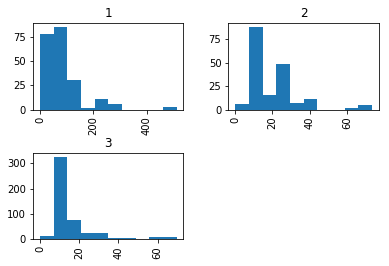

In [59]:
# to view histograms by class separately
df5["Fare"].hist(by=df5['Pclass'])

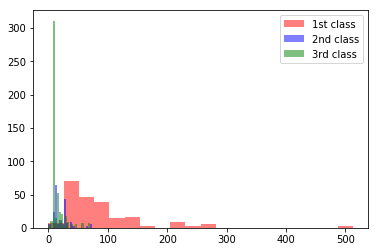

In [60]:
# https://stackoverflow.com/questions/6871201/plot-two-histograms-at-the-same-time-with-matplotlib
# Overlay histograms by class
plt.clf()
plt.hist(df5.loc[df5["Pclass"]==1, "Fare"], bins=20, color="red", alpha=0.5, label='1st class')
plt.hist(df5.loc[df5["Pclass"]==2, "Fare"], bins=20, color="blue", alpha=0.5, label='2nd class')
plt.hist(df5.loc[df5["Pclass"]==3, "Fare"], bins=20, color="green", alpha=0.5, label='3rd class')
plt.legend(loc='upper right')
plt.show()

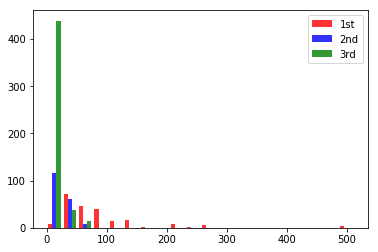

In [61]:
# https://stackoverflow.com/questions/6871201/plot-two-histograms-at-the-same-time-with-matplotlib
# overlay histogram by class, but show side-by-side for clarity.
plt.clf()
plt.hist([
  df5.loc[df5["Pclass"]==1, "Fare"].values,
  df5.loc[df5["Pclass"]==2, "Fare"].values,
  df5.loc[df5["Pclass"]==3, "Fare"].values
], color=['red','blue', 'green'], alpha=0.8, bins=20, label=["1st", "2nd", "3rd"])
plt.legend(loc='upper right')
plt.show()

## What our Neural Network may Look Like

In our version 1 we will have an input layer of nodes. Each node corresponds to a feature. For categorical column we will split it out into multiple nodes so it only takes a value of 1 (True) or 0 (False). This will be a simple linear regression problem

![titanic-logistic-regression-4.jpg](../assets/images/titanic-logistic-regression-4.jpg)

## Data Transformation Strategy

Now that we have our clean data, we will need to transform it a little - to enable us to "plug" into a linear regression model easily. Each feature column will become a Neural Network **node** (or so called **neuron**).

We will aim to have 10 input nerons, and 1 output neron in our Linear Regression Model. We will use cross entropy loss to return us with probability of whether a passenger survive or not. The probabilities will be converted into predicted states: Survived (1) and Not-survived (0) - with the help of the `argmax` function - to pick the class with higher probability).

We currently have a pretty clean Pandas DataFrame. We will now need to transform our categorical and numerical columns like this:

- Each categorical column needs to get pivoted. For example:
    - the `Sex` column currently contains values in the set `["male", "female"]`. We need to transform this into 1 columns: `IsMale`. (1 = male, 0 = female).
    - the `Embarked` column currently contains values in the set `["S", "C", "Q"]`. We need to transform this into 3 columns: `EmbarkedS`, `EmbarkedC`, `EmbarkedQ`. (1 = True, 0 = False).
    - the `Pclass` column currently contains values in the set `[1, 2, or 3]`. We need to transform this into 3 columns: `Is1stClass`, `Is2ndClass`, `Is3rdClass`.
- We further transform our input features through a [feature scaling step](http://sebastianraschka.com/Articles/2014_about_feature_scaling.html) to make the neural network training more effective (by making sure our input values are within a similar scale). [This Kaggle Notebook](https://www.kaggle.com/kbc8894/tutorial-titanic-with-tensorflow) offers a good implementation. We can either use Standardization, Mean Normalization, or Min-Max Scaling.
- By the end of the data transofrmation we may build and validate a Tensorflow Logistic Regression Model.
- We will perform (inference) prediction against our Test dataset in the end.
- Optional: also try out running through a Scikit-learn logistic regression model. Compare results with the Tensorflow model.

In [62]:
df6 = df5.copy()

In [63]:
# required for ease of doing pivot tables later on
df6["Dummy"] = "yo"

### Transofrm Sex Column into Binary Column

In [64]:
# transform Sex into Binary IsMale
df6["IsMale"] = df6['Sex'].map({'male': 1, 'female': 0}).astype(int)
df6[["Sex", "IsMale"]].head()

,Sex,IsMale
PassengerId,,
1,male,1
2,female,0
3,female,0
4,female,0
5,male,1


### Transform Embarked Column into Binary Columns

In [65]:
# transform Embarked into Binary EmbarkedC, EmbarkedQ, and EmbarkedS
df_embarked = pd.pivot_table(df6[["Dummy", "Embarked"]], index="PassengerId", columns="Embarked", aggfunc="count")\
    .fillna(0.).astype(int).rename(columns={"C": "EmbarkedC", "Q": "EmbarkedQ", "S": "EmbarkedS"})
df_embarked.columns = df_embarked.columns.droplevel()
df_embarked.columns = ["EmbarkedC", "EmbarkedQ", "EmbarkedS"]
df_embarked.head()

,EmbarkedC,EmbarkedQ,EmbarkedS
PassengerId,,,
1,0,0,1
2,1,0,0
3,0,0,1
4,0,0,1
5,0,0,1


### Transform Passenger Class Column into Binary Columns

In [66]:
# transform Pclass into Binary Is1stClass, Is2ndClass, and Is3rdClass
df_pclass = pd.pivot_table(df6[["Dummy", "Pclass"]], index="PassengerId", columns="Pclass", aggfunc="count")\
    .fillna(0.).astype(int).rename(columns={1: "Is1stClass", 2: "Is2ndClass", 3: "Is3rdClass"})
df_pclass.columns = df_pclass.columns.droplevel()
df_pclass.columns = ["Is1stClass", "Is2ndClass", "Is3rdClass"]
df_pclass.head()

,Is1stClass,Is2ndClass,Is3rdClass
PassengerId,,,
1,0,0,1
2,1,0,0
3,0,0,1
4,1,0,0
5,0,0,1


### Finalize our Transformed Input Feature Columns

In [67]:
# Stitch these transformed categorical columns back to the main dataframe
df7 = pd.concat([df6, df_embarked, df_pclass], axis="columns")
df7.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FakeAge,Dummy,IsMale,EmbarkedC,EmbarkedQ,EmbarkedS,Is1stClass,Is2ndClass,Is3rdClass
PassengerId,,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,False,yo,1,0,0,1,0,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,False,yo,0,1,0,0,1,0,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False,yo,0,0,0,1,0,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,False,yo,0,0,0,1,1,0,0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,False,yo,1,0,0,1,0,0,1


In [68]:
# Select only the columns we want - for tidiness
params = {}
params['selected_features'] = ['IsMale', "EmbarkedC", "EmbarkedQ", "EmbarkedS", "Is1stClass",
                              "Is2ndClass", "Is3rdClass", 'SibSp', 'Parch', 'Age', 'Fare']
params['label_col'] = "Survived"
params['labeled_cols'] = params['selected_features'] + [params['label_col']]

In [69]:
df_labeled = df7.loc[:, params["labeled_cols"]]
df_labeled.head()

,IsMale,EmbarkedC,EmbarkedQ,EmbarkedS,Is1stClass,Is2ndClass,Is3rdClass,SibSp,Parch,Age,Fare,Survived
PassengerId,,,,,,,,,,,,
1,1,0,0,1,0,0,1,1,0,22.0,7.2500,0
2,0,1,0,0,1,0,0,1,0,38.0,71.2833,1
3,0,0,0,1,0,0,1,0,0,26.0,7.9250,1
4,0,0,0,1,1,0,0,1,0,35.0,53.1000,1
5,1,0,0,1,0,0,1,0,0,35.0,8.0500,0


In [70]:
df_labeled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 12 columns):
IsMale        891 non-null int64
EmbarkedC     891 non-null int64
EmbarkedQ     891 non-null int64
EmbarkedS     891 non-null int64
Is1stClass    891 non-null int64
Is2ndClass    891 non-null int64
Is3rdClass    891 non-null int64
SibSp         891 non-null int64
Parch         891 non-null int64
Age           891 non-null float64
Fare          891 non-null float64
Survived      891 non-null int64
dtypes: float64(2), int64(10)
memory usage: 90.5 KB


We now have our transformed input features. Note again we now have 100% non-null values for all 891 passengers. The next step is to:

1. split `df_labeled` into training dataset (`df_train`) and validation dataset (`df_valid`)
2. apply feature scaling for `df_train` and `df_valid` (features only. no label) -> output Numpy Arrays `X_train` and `X_valid`.
3. extract labels and output into Numpy Arrays `Y_train` and `Y_valid`.

## Split into Training and Validation Sets

In [71]:
# percentage of labeled data we wish to split out for validation
val_percent = 10
num_samples = df_labeled.shape[0]
val_size = int(num_samples * val_percent / 100)
train_size = num_samples - val_size

print("Training Size: {}".format(train_size))
print("Validation Size: {}".format(val_size))

Training Size: 802
Validation Size: 89


In [72]:
df_labeled_shuffled = df_labeled.sample(frac=1, random_state=0)
df_labeled_shuffled.shape

(891, 12)

In [73]:
# check that it's been shuffled
df_labeled_shuffled.head()

,IsMale,EmbarkedC,EmbarkedQ,EmbarkedS,Is1stClass,Is2ndClass,Is3rdClass,SibSp,Parch,Age,Fare,Survived
PassengerId,,,,,,,,,,,,
496,1,1,0,0,0,0,1,0,0,28.0,14.4583,0
649,1,0,0,1,0,0,1,0,0,28.0,7.5500,0
279,1,0,1,0,0,0,1,4,1,7.0,29.1250,0
32,0,1,0,0,1,0,0,1,0,28.0,146.5208,1
256,0,1,0,0,0,0,1,0,2,29.0,15.2458,1


In [74]:
# Obtain our training features and ground truth labels
train_X = df_labeled_shuffled[params["selected_features"]].values[:train_size, :]
train_Y = df_labeled_shuffled[params['label_col']].values.reshape(-1, 1)[:train_size, :]

# Obtain our validation features and ground truth labels
valid_X = df_labeled_shuffled[params["selected_features"]].values[train_size:, :]
valid_Y = df_labeled_shuffled[params['label_col']].values.reshape(-1, 1)[train_size:, :]

print(train_X.shape, train_Y.shape)
print(valid_X.shape, valid_Y.shape)

(802, 11) (802, 1)
(89, 11) (89, 1)


## Feature Scaling

It turns out we can do this really easily with Scikit Learn. See [this refernce article](http://sebastianraschka.com/Articles/2014_about_feature_scaling.html). This will effectively turn the Pandas DataFrame into a 2D Numpy Array - just what we need for machine learning. Columns corresponds to input features, rows corresponds to samples.

After standardization we should expect to see the followings:

- a mean value of around 0
- standard deviation of around 1

Here we will perform feature scaling for `X_train` and `X_valid`, and obtain our scaled `X_train_scaled` and `X_valid_scaled`.

In [75]:
from sklearn import preprocessing

train_X_scaled_std = preprocessing.StandardScaler().fit(train_X)
train_X_scaled = train_X_scaled_std.transform(train_X)

In [76]:
train_X_scaled.shape

(802, 11)

In [77]:
# Take a peek at first 5 training samples - not that all the values are more or less within the same range.
train_X_scaled[:5]

array([[ 0.72837789,  2.12862267, -0.30681215, -1.65760778, -0.56871112,
        -0.50116868,  0.89568253, -0.46589148, -0.46737107, -0.10784518,
        -0.35073244],
       [ 0.72837789, -0.46978735, -0.30681215,  0.60327902, -0.56871112,
        -0.50116868,  0.89568253, -0.46589148, -0.46737107, -0.10784518,
        -0.48643749],
       [ 0.72837789, -0.46978735,  3.2593233 , -1.65760778, -0.56871112,
        -0.50116868,  0.89568253,  3.17055589,  0.76158499, -1.71166727,
        -0.06262317],
       [-1.37291372,  2.12862267, -0.30681215, -1.65760778,  1.75836195,
        -0.50116868, -1.11646702,  0.44322036, -0.46737107, -0.10784518,
         2.2434728 ],
       [-1.37291372,  2.12862267, -0.30681215, -1.65760778, -0.56871112,
        -0.50116868,  0.89568253, -0.46589148,  1.99054104, -0.0314727 ,
        -0.33526297]])

In [78]:
# After standardization we should expect a mean value of 0, and standard deviation of 1.
print("input feature mean after standardization: {}".format(train_X_scaled.mean()))
print("input feature std after standardization: {}".format(train_X_scaled.std()))

input feature mean after standardization: 1.912875762219721e-18
input feature std after standardization: 1.0


In [79]:
# Do the same for the validation set
valid_X_scaled_std = preprocessing.StandardScaler().fit(valid_X)
valid_X_scaled = valid_X_scaled_std.transform(valid_X)

# After standardization we should expect a mean value of 0, and standard deviation of 1.
print("input feature mean after standardization: {}".format(valid_X_scaled.mean()))
print("input feature std after standardization: {}".format(valid_X_scaled.std()))

input feature mean after standardization: -1.995906561123877e-17
input feature std after standardization: 0.9999999999999999


## Tensorflow

Let's try out an implementation by [this Kaggle Kernal](https://www.kaggle.com/kbc8894/tutorial-titanic-with-tensorflow/notebook)

In [80]:
import math
def random_mini_batches(X, Y, mini_batch_size = 64, seed = SEED):
    """
    Creates a list of random minibatches from (X, Y)
    
    Arguments:
    X -- input data, of shape (input size, number of examples)
    Y -- true "label" vector (1 for blue dot / 0 for red dot), of shape (1, number of examples)
    mini_batch_size -- size of the mini-batches, integer
    
    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """
    
    np.random.seed(seed)            # To make your "random" minibatches the same as ours
    m = X.shape[0]                  # number of training examples
    mini_batches = []
        
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[permutation, :]
    shuffled_Y = Y[permutation, :].reshape((m,1))

    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        ### START CODE HERE ### (approx. 2 lines)
        mini_batch_X = shuffled_X[k * mini_batch_size : (k + 1) * mini_batch_size, :]
        mini_batch_Y = shuffled_Y[k * mini_batch_size : (k + 1) * mini_batch_size, :]
        ### END CODE HERE ###
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        ### START CODE HERE ### (approx. 2 lines)
        mini_batch_X = shuffled_X[num_complete_minibatches * mini_batch_size:, :]
        mini_batch_Y = shuffled_Y[num_complete_minibatches * mini_batch_size:, :]
        ### END CODE HERE ###
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

In [81]:
import tensorflow as tf
def make_model(parameters):
    num_feature = len(parameters['selected_features'])
    X = tf.placeholder(tf.float32, [None, num_feature])
    Y = tf.placeholder(tf.float32, [None, 1])

    layers_dim = parameters['layers_dim']
    fc = tf.contrib.layers.stack(X, tf.contrib.layers.fully_connected, layers_dim)
    hypothesis = tf.contrib.layers.fully_connected(fc, 1, activation_fn=None)
    loss = tf.nn.sigmoid_cross_entropy_with_logits(logits=hypothesis, labels=Y)
    cost = tf.reduce_mean(loss)
    
    learning_rate = parameters['learning_rate']
    train_op = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    
    prediction = tf.round(tf.sigmoid(hypothesis))
    correct_prediction = tf.equal(prediction, Y)
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    model = {'X': X, 'Y': Y, 'hypothesis': hypothesis, 'cost': cost,
             'train_op': train_op, 'prediction': prediction, 'accuracy': accuracy}
    
    return model

In [82]:
def train(parameters, model):
    num_epochs = parameters['num_epochs']
    minibatch_size = parameters['minibatch_size']
    train_size = train_X.shape[0]
    saver = tf.train.Saver()
    epoch_list = []
    cost_list = []
    with tf.Session() as sess:
        init_op = tf.group(tf.global_variables_initializer(), tf.local_variables_initializer())
        sess.run(init_op)
        for epoch in range(num_epochs):
            epoch_cost = 0.
            num_minibatches = int(train_size / minibatch_size)
            minibatches = random_mini_batches(train_X, train_Y, minibatch_size)
            for minibatch in minibatches:
                (minibatch_X, minibatch_Y) = minibatch
                feed_dict = {model['X'] : minibatch_X, model['Y'] : minibatch_Y}
                _ ,minibatch_cost = sess.run([model['train_op'], model['cost']], feed_dict= feed_dict)
                epoch_cost += minibatch_cost / num_minibatches
            if parameters['print'] and (epoch % parameters['print_freq'] == 0):
                print ("Cost after epoch %i: %f" % (epoch, epoch_cost))
            if parameters['save_cost'] and (epoch % parameters['save_cost_freq'] == 0):
                epoch_list.append(epoch)
                cost_list.append(epoch_cost)
        saver.save(sess, parameters['model_name'])
    return {'epoch_list': epoch_list, 'cost_list' : cost_list}

In [83]:
# set model parameters
params['layers_dim'] = [11]
params['learning_rate'] = 0.01
# set train parameters (hyper parameter)
params['num_epochs'] = 2000
params['minibatch_size'] = 16
# set option parameters
# save files to the folder ./titanic, within it the files are labeled "titanic*"
params['model_name'] = './titanic/titanic'
params['print'] = True
params['print_freq'] = 100
params['save_cost'] = True
params['save_cost_freq'] = 10

for k, v in params.items():
    print(k, '=', v)

selected_features = ['IsMale', 'EmbarkedC', 'EmbarkedQ', 'EmbarkedS', 'Is1stClass', 'Is2ndClass', 'Is3rdClass', 'SibSp', 'Parch', 'Age', 'Fare']
label_col = Survived
labeled_cols = ['IsMale', 'EmbarkedC', 'EmbarkedQ', 'EmbarkedS', 'Is1stClass', 'Is2ndClass', 'Is3rdClass', 'SibSp', 'Parch', 'Age', 'Fare', 'Survived']
layers_dim = [11]
learning_rate = 0.01
num_epochs = 2000
minibatch_size = 16
model_name = ./titanic/titanic
print = True
print_freq = 100
save_cost = True
save_cost_freq = 10


In [84]:
with tf.Graph().as_default():
    model = make_model(params)
    plot_data = train(params, model)

Cost after epoch 0: 2.212799
Cost after epoch 100: 0.417451
Cost after epoch 200: 0.406304
Cost after epoch 300: 0.387276
Cost after epoch 400: 0.384839
Cost after epoch 500: 0.382267
Cost after epoch 600: 0.374042
Cost after epoch 700: 0.373286
Cost after epoch 800: 0.386044
Cost after epoch 900: 0.391727
Cost after epoch 1000: 0.375360
Cost after epoch 1100: 0.365616
Cost after epoch 1200: 0.363210
Cost after epoch 1300: 0.361583
Cost after epoch 1400: 0.373284
Cost after epoch 1500: 0.371855
Cost after epoch 1600: 0.372436
Cost after epoch 1700: 0.371602
Cost after epoch 1800: 0.372198
Cost after epoch 1900: 0.386642


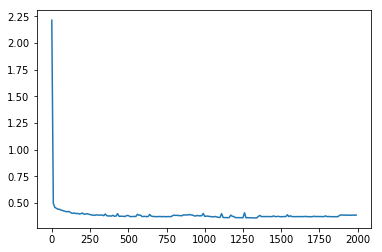

In [85]:
import matplotlib.pyplot as plt
if params['save_cost']:
    plt.plot(plot_data['epoch_list'], plot_data['cost_list'])

In [86]:
def evaluate(parameters, model):
    saver = tf.train.Saver()
    with tf.Session() as sess:
        init_op = tf.group(tf.global_variables_initializer(), tf.local_variables_initializer())
        sess.run(init_op)
        saver.restore(sess, parameters['model_name'])
        print ("Train Accuracy:", model['accuracy'].eval({model['X']: train_X, model['Y']: train_Y}))
        print ("Valid Accuracy:", model['accuracy'].eval({model['X']: valid_X, model['Y']: valid_Y}))

In [87]:
with tf.Graph().as_default():
    model = make_model(params)
    evaluate(params, model)

INFO:tensorflow:Restoring parameters from ./titanic/titanic
Train Accuracy: 0.830424
Valid Accuracy: 0.741573


In [88]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(train_X, train_Y)
match = np.sum(valid_Y == np.round(regr.predict(valid_X)))
print('match ratio with linear_model of scikit-learn: ', match / valid_Y.shape[0])

match ratio with linear_model of scikit-learn:  0.808988764045


## Inference against test set

Notes:

- this section is a bit ugly. I have rushed it. I promise I will come back to this and write this notebook up properly later.
- here I have essentially "copy and paste" (and adjusted) the codes what I did for cleaning the labeled dataset earlier in this notebook. It should be noted that a more elegant solution is to wrap the reusable parts as reusable functions (which will reduce code maintenance). That will be another work for another day.

In [89]:
# parse CSV into a Pandas DataFrame
df_test =pd.read_csv('../input/titanic/test.csv')

In [90]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [91]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## Clean the Test Dataset

The data quality of our test dataset is similar to our labeled dataset. Some observations however:

- Lots of missing `Cabin` data as well. Which is consistant. Doesn't matter as we will drop this column anyway.
- We have 1 row with missing `Fare`. The strategy will be to use the median fare of passenger belonging to the same class. (as 1st, 2nd, and 3rd class have different distribution in fare).
- 86 rows with missing `Age`. Consistent with the labeled dataset. We will fill the `NaN` values with median age. (which we will see, the median age will be somewhat similar).

In [92]:
df_test.shape

(418, 11)

### Drop Cabin Column

In [93]:
# 1 - We ignore the column Cabin (too many missing data)
df_test_2 = df_test.drop(['Cabin'], axis=1)

### Fill Missing Age with Median Age

In [94]:
# 2 - fill missing age with median age
median_age_test = df_test_2["Age"].median()
median_age_test

27.0

In [95]:
# Create a `FakeAge` flag (1=True/0=False) to indicate the Age column is fake due to NaN
df_test_3 = df_test_2.copy()
df_test_3["FakeAge"] = df_test_3["Age"].apply(lambda x: True if np.isnan(x) else False)

In [96]:
# fill NaN age with our `median_age`
df_test_4 = df_test_3.copy()
df_test_4["Age"] = df_test_4["Age"].fillna(median_age_test)

In [97]:
# we can confirm none of our rows contain missing `Age`.
df_test_4.loc[pd.isnull(df_test_4["Age"])].head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FakeAge


Let's double check against our 5 passengers with missing `Age`. We should expect it's been filled with the median age value of `28`

In [98]:
# Ensure none of our age values are missing
assert df_test_4["Age"].isnull().values.any() == False
assert df_test_4["Age"].notnull().values.all() == True

### Fill Missing Fare with Median Fare of same passenger class

In [99]:
# Who has missing Fare? (Passenger 152, a 3rd class)
df_test_4.loc[pd.isnull(df_test_4["Fare"])].head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FakeAge
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S,False


In [100]:
median_fare_3rd_class_test = df_test_4.loc[df_test_4["Pclass"] == 3, "Fare"].median()
median_fare_3rd_class_test

7.8958

In [101]:
# fill the missing Fare with the median of Fare of the pessenger of the same class
df_test_5 = df_test_4.copy()
df_test_5["Fare"] = df_test_5["Fare"].fillna(median_fare_3rd_class_test)

In [102]:
# we can confirm none of our rows contain missing `Fare`.
df_test_5.loc[pd.isnull(df_test_5["Fare"])].head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FakeAge


In [103]:
assert df_test_5.isnull().values.any() == False
assert df_test_5.notnull().values.all() == True

In [104]:
df_test_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Embarked       418 non-null object
FakeAge        418 non-null bool
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 33.1+ KB


No more missing data!

In [105]:
df_test_5.shape

(418, 11)

In [106]:
assert df_test_5.shape[0] == 418
assert df_test_5.shape[1] == 11

In [107]:
df_test_6 = df_test_5.copy()
df_test_6 = df_test_6.set_index("PassengerId")
df_test_6.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FakeAge
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,False
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,False
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,False
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,False
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,False


## Transform Test Data

We need to transform our Test Feature Dataset (like for our Training / Validation dataset earlier) - so we can plug in to our Neural Network.

In [108]:
# required for ease of doing pivot tables later on
df_test_6["Dummy"] = "yo"

### Transofrm Sex Column into Binary Column

In [109]:
# transform Sex into Binary IsMale
df_test_6["IsMale"] = df_test_6['Sex'].map({'male': 1, 'female': 0}).astype(int)
df_test_6[["Sex", "IsMale"]].head()

,Sex,IsMale
PassengerId,,
892,male,1
893,female,0
894,male,1
895,male,1
896,female,0


### Transform Embarked Column into Binary Columns

In [110]:
# transform Embarked into Binary EmbarkedC, EmbarkedQ, and EmbarkedS
df_embarked_test = pd.pivot_table(df_test_6[["Dummy", "Embarked"]], index="PassengerId", columns="Embarked", aggfunc="count")\
    .fillna(0.).astype(int).rename(columns={"C": "EmbarkedC", "Q": "EmbarkedQ", "S": "EmbarkedS"})
df_embarked_test.columns = df_embarked_test.columns.droplevel()
df_embarked_test.columns = ["EmbarkedC", "EmbarkedQ", "EmbarkedS"]
df_embarked_test.head()

,EmbarkedC,EmbarkedQ,EmbarkedS
PassengerId,,,
892,0,1,0
893,0,0,1
894,0,1,0
895,0,0,1
896,0,0,1


### Transform Passenger Class Column into Binary Columns

In [111]:
# transform Pclass into Binary Is1stClass, Is2ndClass, and Is3rdClass
df_pclass_test = pd.pivot_table(df_test_6[["Dummy", "Pclass"]], index="PassengerId", columns="Pclass", aggfunc="count")\
    .fillna(0.).astype(int).rename(columns={1: "Is1stClass", 2: "Is2ndClass", 3: "Is3rdClass"})
df_pclass_test.columns = df_pclass_test.columns.droplevel()
df_pclass_test.columns = ["Is1stClass", "Is2ndClass", "Is3rdClass"]
df_pclass_test.head()

,Is1stClass,Is2ndClass,Is3rdClass
PassengerId,,,
892,0,0,1
893,0,0,1
894,0,1,0
895,0,0,1
896,0,0,1


### Finalize our Transformed Input Feature Columns

In [112]:
# Stitch these transformed categorical columns back to the main dataframe
df_test_7 = pd.concat([df_test_6, df_embarked_test, df_pclass_test], axis="columns")
df_test_7.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FakeAge,Dummy,IsMale,EmbarkedC,EmbarkedQ,EmbarkedS,Is1stClass,Is2ndClass,Is3rdClass
PassengerId,,,,,,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,False,yo,1,0,1,0,0,0,1
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,False,yo,0,0,0,1,0,0,1
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,False,yo,1,0,1,0,0,1,0
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,False,yo,1,0,0,1,0,0,1
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,False,yo,0,0,0,1,0,0,1


In [113]:
df_test_7.shape

(418, 18)

In [114]:
# Obtain our training features and ground truth labels
test_X = df_test_7[params["selected_features"]].values

print(test_X.shape)

(418, 11)


## Feature Scaling (Test Dataset)

Pretty much the same procedure as what we did earlier.

In [115]:
from sklearn import preprocessing

test_X_scaled_std = preprocessing.StandardScaler().fit(test_X)
test_X_scaled = test_X_scaled_std.transform(test_X)

In [116]:
test_X_scaled.shape

(418, 11)

In [117]:
# Take a peek at first 5 test samples - not that all the values are more or less within the same range.
test_X_scaled[:5]

array([[ 0.75592895, -0.56814154,  2.84375747, -1.35067551, -0.58655899,
        -0.5349335 ,  0.95782629, -0.49947002, -0.4002477 ,  0.38623105,
        -0.49707093],
       [-1.32287566, -0.56814154, -0.35164743,  0.74037028, -0.58655899,
        -0.5349335 ,  0.95782629,  0.61699237, -0.4002477 ,  1.37137004,
        -0.51193378],
       [ 0.75592895, -0.56814154,  2.84375747, -1.35067551, -0.58655899,
         1.86939125, -1.04403065, -0.49947002, -0.4002477 ,  2.55353683,
        -0.46376216],
       [ 0.75592895, -0.56814154, -0.35164743,  0.74037028, -0.58655899,
        -0.5349335 ,  0.95782629, -0.49947002, -0.4002477 , -0.20485235,
        -0.48213459],
       [-1.32287566, -0.56814154, -0.35164743,  0.74037028, -0.58655899,
        -0.5349335 ,  0.95782629,  0.61699237,  0.61989583, -0.59890794,
        -0.41715893]])

In [118]:
# After standardization we should expect a mean value of 0, and standard deviation of 1.
print("test input feature mean after standardization: {}".format(test_X_scaled.mean()))
print("test input feature std after standardization: {}".format(test_X_scaled.std()))

test input feature mean after standardization: 3.47699250861293e-18
test input feature std after standardization: 1.0


## Predict Passenger Survival against Test Dataset

At long last. We will now use our Inference model to form prediction - do we think the passenger survived (based on the selected input features)? We will output result to a CSV at the end.

In [119]:
def predict(parameters, model):
    saver = tf.train.Saver()
    with tf.Session() as sess:
        init_op = tf.group(tf.global_variables_initializer(), tf.local_variables_initializer())
        sess.run(init_op)
        saver.restore(sess, params['model_name'])
        return model['prediction'].eval({model['X']: test_X})

In [120]:
answer = pd.DataFrame(df_test['PassengerId'], columns=['PassengerId'])

In [121]:
with tf.Graph().as_default():
    model = make_model(params)
    test_Y = predict(params, model)
    answer['Survived'] = test_Y.astype(int)

INFO:tensorflow:Restoring parameters from ./titanic/titanic


In [122]:
# This is the CSV that we will submit to Kaggle
answer.to_csv('./titanic/titanic_test_predictions.csv', index=False)

In [123]:
answer.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [124]:
test_survived_group = answer.groupby('Survived')['Survived']

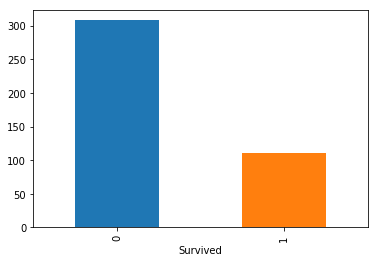

In [125]:
test_survived_group.count().plot(kind="bar")

Kaggle Test Accuracy: 0.73684 (Note: This leaderboard is calculated with approximately 50% of the test data.). This is roughly about rank 8558 as of 9th Feb. Not bad for a first submission based on a Neural Network!